In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *
from PIL import Image
import PIL
import os
from collections import Counter


In [2]:
img = cv.imread("tsrd-train/000_0001.png")
show_img("original", img)
file_list = os.listdir("tsrd-train")
images = [file for file in file_list if file.endswith('.png')]

In [3]:
!pip install imagehash


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


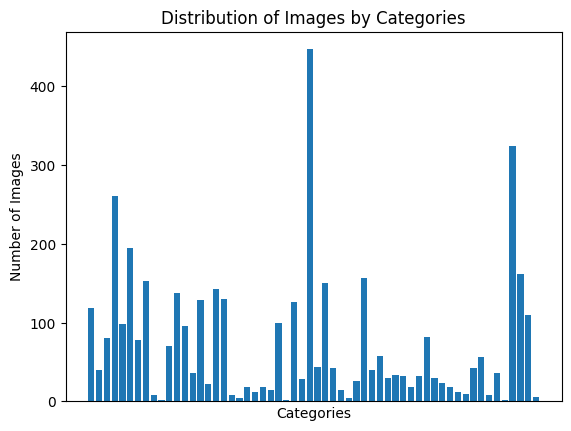

<Figure size 200x200 with 0 Axes>

In [4]:
#show that the classes are imbalance
import matplotlib.pyplot as plt

labels = [image_name.split('_')[0] for image_name in images]
label_counts = Counter(labels)

# Create a histogram
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks([])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Categories')
plt.figure(figsize=(2,2))
plt.show()


In [5]:
# Data cleaning

from PIL import Image
import imagehash
store = [] # Store hash number
cleared_list = [] # Find out the hash number that is not duplicated
duplicated = [] # find out the duplicated index
cleared_index = [] # find out the non-duplicated index


for i in range (len(images)):
    hash_num = imagehash.average_hash(Image.open("tsrd-train/" + str(images[i])))
    store.append(str(hash_num))

for i, item in enumerate(store):
    if item not in cleared_list:
        cleared_list.append(item)
    else:
        duplicated.append(i)

for i in range (len(store)):
    if i in duplicated:
        continue
    else:
        cleared_index.append(images[i])

print("duplicated", duplicated)
print(len(duplicated))
print("cleared", cleared_index)
print(len(cleared_index))


duplicated [49, 51, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 286, 301, 312, 319, 366, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 4

In [6]:
# Store the non-duplicated images in the folder

import os
from shutil import copyfile

# Create the output folder if it doesn't exist
output_folder = 'cleared_folder/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Specify the source folder containing the original images
source_folder = 'tsrd-train/'

# Iterate through the cleared_index list and copy the corresponding images to the output folder
for image_name in cleared_index:
    source_path = os.path.join(source_folder, image_name)
    target_path = os.path.join(output_folder, image_name)
    
    # Copy the image from the source folder to the output folder
    copyfile(source_path, target_path)

print("Images have been copied to 'cleared_folder' folder.")

Images have been copied to 'cleared_folder' folder.


In [7]:
#histogram equalization

def equalize_image(img):
    # Equalization
    eq = cv.equalizeHist(img)
    # CLAHE
    clahe = cv.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
    dst = clahe.apply(img)
    return eq, dst

# Directory containing the images
source_folder = 'cleared_folder/'
image_dir = source_folder

output_folder = "equalized_dataset/"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each image in the list
for filename in cleared_index:
    # Read the image
    img_path = os.path.join(image_dir, filename)
    img = cv.imread(img_path, 0)

    if img is not None:
        # Equalize the image
        eq_img , clahe_img = equalize_image(img)

        # You can save the processed images if needed
        cv.imwrite(os.path.join(output_folder, f"{filename}"), eq_img)
        # cv.imwrite(os.path.join(output_folder, f"clahe_{filename}"), clahe_img)
        
print("Finished Equalized")

Finished Equalized


In [8]:
# Counter to count each amount of data in each category

from collections import Counter

cumsum = 0
total_over,total_below=0,0

overlist, belowlist = [], []
within_total,outside_total=0,0

# Function to extract the first part before the first underscore
def get_prefix(s):
    return s.split('_')[0]

# Count the frequency of the first parts
frequency_counter = Counter(get_prefix(filename) for filename in cleared_index)

print(frequency_counter)

average = round(sum(frequency_counter.values())/56)
print(average)
for key, count in frequency_counter.items():
    print(f"{key}: {count}")

    cumsum += count

    if count > 40:
        overlist.append(key)
        total_over+=1

    elif count < 20:
        belowlist.append(key)
        total_below+=1

print("which image over the count: ",total_over) #20
print("which image below the count: ",total_below) #38

print("\nTotal images: ", cumsum)
#print(belowlist)
print(frequency_counter["000"])
print(overlist)

Counter({'003': 125, '054': 110, '005': 96, '035': 74, '007': 71, '028': 68, '055': 66, '017': 65, '026': 63, '014': 62, '056': 55, '000': 52, '024': 50, '004': 49, '016': 47, '002': 40, '006': 39, '043': 33, '030': 32, '011': 31, '037': 29, '029': 21, '031': 21, '049': 21, '001': 20, '013': 18, '036': 17, '040': 16, '042': 16, '010': 15, '038': 15, '039': 15, '044': 14, '027': 13, '034': 13, '045': 12, '052': 12, '012': 11, '015': 11, '050': 10, '020': 9, '022': 9, '041': 9, '046': 9, '023': 7, '032': 7, '021': 6, '018': 4, '048': 4, '051': 4, '008': 3, '047': 3, '057': 3, '019': 2, '033': 2, '009': 1, '025': 1, '053': 1})
29
000: 52
001: 20
002: 40
003: 125
004: 49
005: 96
006: 39
007: 71
008: 3
009: 1
010: 15
011: 31
012: 11
013: 18
014: 62
015: 11
016: 47
017: 65
018: 4
019: 2
020: 9
021: 6
022: 9
023: 7
024: 50
025: 1
026: 63
027: 13
028: 68
029: 21
030: 32
031: 21
032: 7
033: 2
034: 13
035: 74
036: 17
037: 29
038: 15
039: 15
040: 16
041: 9
042: 16
043: 33
044: 14
045: 12
046: 9
0

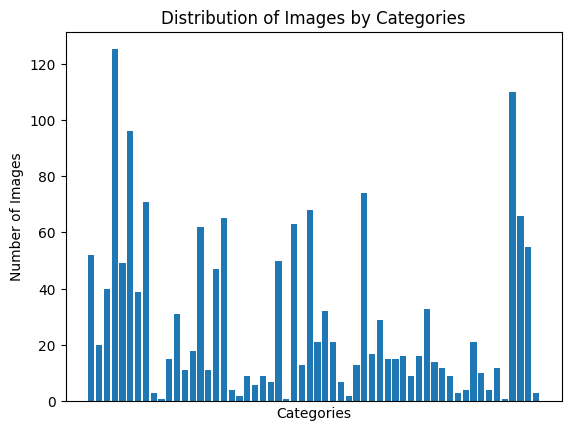

<Figure size 200x200 with 0 Axes>

In [9]:
#show that the classes are imbalance

import matplotlib.pyplot as plt

labels = [image_name.split('_')[0] for image_name in cleared_index]
label_counts = Counter(labels)


# Create a histogram
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks([])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Categories')
plt.figure(figsize=(2,2))
plt.show()


In [10]:
resize_width = 64
resize_height = 64

In [11]:
def resize_img():
    input_folder = 'equalized_dataset/'

    if not os.path.exists(input_folder):
        os.makedirs(input_folder)
    
    resize_width = 64
    resize_height = 64

    for filename in os.listdir(input_folder):
        if filename.endswith(('.png')):
            image_path = os.path.join(input_folder, filename)
            image = cv.imread(image_path)

            resized_image = cv.resize(image, (resize_width, resize_height))

            cv.imwrite((image_path), resized_image)


resize_img()
print("All images has been resized.")

All images has been resized.


In [12]:
## Data augmentation

import random

## To produce different angle, brightness, scale of image
## increasing training sets.

def random_pic_generator(img, angle = 10, w = 64, h = 64):
    
    yc, xc = h // 2, w // 2
    angle = random.randint(-angle, angle)
    scale_range =  random.randint(70, 130)
    scale = scale_range / 100
    M = cv.getRotationMatrix2D((xc, yc), angle, scale)
    dst = cv.warpAffine(img, M, (w, h))

    gamma_no = random.randint(5, 30)
    gamma = gamma_no / 10
    lookUpTable = np.empty((1,256), dtype = np.uint8)
    for i in range(256):
        lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0 ,255)
    res = cv.LUT(dst, lookUpTable)
    
    return(res)



In [13]:
#data augmentation (add images)

import os
import random
import cv2 as cv
from collections import Counter

# Define the show_img function to display images
def show_img(img, title="Image"):
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Function to perform image augmentation (in this case, flipping)
def augment_image(img):
    flipped_img = cv.flip(img, 1)
    return flipped_img


cumsum = 0
total_over, total_below = 0, 0
overlist, belowlist = [], []

# Function to extract the first part before the first underscore
def get_prefix(s):
    return s.split('_')[0]

# Count the frequency of the first parts
frequency_counter = Counter(get_prefix(filename) for filename in cleared_index)


for key, count in frequency_counter.items():
    cumsum += count

    if count < 55:
        total_below += 1
        belowlist.append(key)
        
difference = {}
for i in belowlist:
    minus = 55 - (frequency_counter[i])
    difference[i]=minus      
print(difference)

# Directory to save augmented images (replace with your actual directory)
output_dir = "path_to_output_directory"
os.makedirs(output_dir, exist_ok=True)

input_dir = "equalized_dataset"

# List all files in the directory
all_files = os.listdir(input_dir)


# Augment classes with fewer than 55 images and save augmented images
for class_label in belowlist:
    matching_files = [filename for filename in all_files if filename.split("_")[0] == class_label]
    
    if matching_files:
        for i in range(difference[class_label]):  # Use "_" as the loop variable
            # Randomly select one image for augmentation, even if there are more than 20
            random_img_filename = random.choice(matching_files)
            img_path = os.path.join(input_dir, random_img_filename)
            img = cv.imread(img_path)
            unique_name = f"{class_label}_{i}_{random.randint(1, 9999)}" 
            

            if img is not None:
                # Augment the image
                augmented_img = random_pic_generator(img)

                # Construct the output path for the augmented image
                output_filename = f"{unique_name}.jpg"
                output_path = os.path.join(input_dir, output_filename)

                # Save the augmented image
                saved = cv.imwrite((output_path), augmented_img)

                if saved:
                    print(f"Saved augmented image to {output_path}")
                else:
                    print(f"Failed to save augmented image to {output_path}")
            else:
                print(f"Failed to read image at {img_path}")
    else:
        print(f"No matching files found for class label {class_label}.")

folder1 = input_dir
folder2 = output_dir  # Note that folder2 is a relative path

# Join folder1 and folder2
joined_path = os.path.join(folder1, folder2)

# Print the joined path
print(joined_path)

{'000': 3, '001': 35, '002': 15, '004': 6, '006': 16, '008': 52, '009': 54, '010': 40, '011': 24, '012': 44, '013': 37, '015': 44, '016': 8, '018': 51, '019': 53, '020': 46, '021': 49, '022': 46, '023': 48, '024': 5, '025': 54, '027': 42, '029': 34, '030': 23, '031': 34, '032': 48, '033': 53, '034': 42, '036': 38, '037': 26, '038': 40, '039': 40, '040': 39, '041': 46, '042': 39, '043': 22, '044': 41, '045': 43, '046': 46, '047': 52, '048': 51, '049': 34, '050': 45, '051': 51, '052': 43, '053': 54, '057': 52}
Saved augmented image to equalized_dataset\000_0_965.jpg
Saved augmented image to equalized_dataset\000_1_2909.jpg
Saved augmented image to equalized_dataset\000_2_4672.jpg
Saved augmented image to equalized_dataset\001_0_8817.jpg
Saved augmented image to equalized_dataset\001_1_325.jpg
Saved augmented image to equalized_dataset\001_2_7330.jpg
Saved augmented image to equalized_dataset\001_3_1485.jpg
Saved augmented image to equalized_dataset\001_4_6881.jpg
Saved augmented image to

Saved augmented image to equalized_dataset\009_16_3035.jpg
Saved augmented image to equalized_dataset\009_17_3889.jpg
Saved augmented image to equalized_dataset\009_18_6813.jpg
Saved augmented image to equalized_dataset\009_19_8780.jpg
Saved augmented image to equalized_dataset\009_20_9431.jpg
Saved augmented image to equalized_dataset\009_21_2516.jpg
Saved augmented image to equalized_dataset\009_22_1178.jpg
Saved augmented image to equalized_dataset\009_23_4744.jpg
Saved augmented image to equalized_dataset\009_24_8410.jpg
Saved augmented image to equalized_dataset\009_25_6216.jpg
Saved augmented image to equalized_dataset\009_26_5477.jpg
Saved augmented image to equalized_dataset\009_27_4600.jpg
Saved augmented image to equalized_dataset\009_28_6754.jpg
Saved augmented image to equalized_dataset\009_29_9217.jpg
Saved augmented image to equalized_dataset\009_30_977.jpg
Saved augmented image to equalized_dataset\009_31_2462.jpg
Saved augmented image to equalized_dataset\009_32_6825.jp

Saved augmented image to equalized_dataset\012_42_4897.jpg
Saved augmented image to equalized_dataset\012_43_6639.jpg
Saved augmented image to equalized_dataset\013_0_2630.jpg
Saved augmented image to equalized_dataset\013_1_9424.jpg
Saved augmented image to equalized_dataset\013_2_7689.jpg
Saved augmented image to equalized_dataset\013_3_6740.jpg
Saved augmented image to equalized_dataset\013_4_6633.jpg
Saved augmented image to equalized_dataset\013_5_7530.jpg
Saved augmented image to equalized_dataset\013_6_8624.jpg
Saved augmented image to equalized_dataset\013_7_1566.jpg
Saved augmented image to equalized_dataset\013_8_728.jpg
Saved augmented image to equalized_dataset\013_9_7433.jpg
Saved augmented image to equalized_dataset\013_10_1632.jpg
Saved augmented image to equalized_dataset\013_11_6901.jpg
Saved augmented image to equalized_dataset\013_12_7845.jpg
Saved augmented image to equalized_dataset\013_13_7771.jpg
Saved augmented image to equalized_dataset\013_14_8369.jpg
Saved au

Saved augmented image to equalized_dataset\019_0_2973.jpg
Saved augmented image to equalized_dataset\019_1_2932.jpg
Saved augmented image to equalized_dataset\019_2_3618.jpg
Saved augmented image to equalized_dataset\019_3_3425.jpg
Saved augmented image to equalized_dataset\019_4_7149.jpg
Saved augmented image to equalized_dataset\019_5_3209.jpg
Saved augmented image to equalized_dataset\019_6_1608.jpg
Saved augmented image to equalized_dataset\019_7_3180.jpg
Saved augmented image to equalized_dataset\019_8_566.jpg
Saved augmented image to equalized_dataset\019_9_7721.jpg
Saved augmented image to equalized_dataset\019_10_2442.jpg
Saved augmented image to equalized_dataset\019_11_6266.jpg
Saved augmented image to equalized_dataset\019_12_349.jpg
Saved augmented image to equalized_dataset\019_13_8937.jpg
Saved augmented image to equalized_dataset\019_14_2920.jpg
Saved augmented image to equalized_dataset\019_15_2551.jpg
Saved augmented image to equalized_dataset\019_16_4596.jpg
Saved aug

Saved augmented image to equalized_dataset\022_0_7620.jpg
Saved augmented image to equalized_dataset\022_1_505.jpg
Saved augmented image to equalized_dataset\022_2_2396.jpg
Saved augmented image to equalized_dataset\022_3_1742.jpg
Saved augmented image to equalized_dataset\022_4_8542.jpg
Saved augmented image to equalized_dataset\022_5_9580.jpg
Saved augmented image to equalized_dataset\022_6_8945.jpg
Saved augmented image to equalized_dataset\022_7_5862.jpg
Saved augmented image to equalized_dataset\022_8_5149.jpg
Saved augmented image to equalized_dataset\022_9_8114.jpg
Saved augmented image to equalized_dataset\022_10_1161.jpg
Saved augmented image to equalized_dataset\022_11_1904.jpg
Saved augmented image to equalized_dataset\022_12_1050.jpg
Saved augmented image to equalized_dataset\022_13_9008.jpg
Saved augmented image to equalized_dataset\022_14_4920.jpg
Saved augmented image to equalized_dataset\022_15_4978.jpg
Saved augmented image to equalized_dataset\022_16_6844.jpg
Saved au

Saved augmented image to equalized_dataset\025_50_9614.jpg
Saved augmented image to equalized_dataset\025_51_4003.jpg
Saved augmented image to equalized_dataset\025_52_3435.jpg
Saved augmented image to equalized_dataset\025_53_4188.jpg
Saved augmented image to equalized_dataset\027_0_3082.jpg
Saved augmented image to equalized_dataset\027_1_4235.jpg
Saved augmented image to equalized_dataset\027_2_1255.jpg
Saved augmented image to equalized_dataset\027_3_39.jpg
Saved augmented image to equalized_dataset\027_4_1316.jpg
Saved augmented image to equalized_dataset\027_5_4469.jpg
Saved augmented image to equalized_dataset\027_6_851.jpg
Saved augmented image to equalized_dataset\027_7_1360.jpg
Saved augmented image to equalized_dataset\027_8_2861.jpg
Saved augmented image to equalized_dataset\027_9_61.jpg
Saved augmented image to equalized_dataset\027_10_2813.jpg
Saved augmented image to equalized_dataset\027_11_1828.jpg
Saved augmented image to equalized_dataset\027_12_5005.jpg
Saved augmen

Saved augmented image to equalized_dataset\032_18_5649.jpg
Saved augmented image to equalized_dataset\032_19_7652.jpg
Saved augmented image to equalized_dataset\032_20_588.jpg
Saved augmented image to equalized_dataset\032_21_6310.jpg
Saved augmented image to equalized_dataset\032_22_266.jpg
Saved augmented image to equalized_dataset\032_23_2763.jpg
Saved augmented image to equalized_dataset\032_24_3293.jpg
Saved augmented image to equalized_dataset\032_25_3174.jpg
Saved augmented image to equalized_dataset\032_26_1444.jpg
Saved augmented image to equalized_dataset\032_27_1521.jpg
Saved augmented image to equalized_dataset\032_28_7527.jpg
Saved augmented image to equalized_dataset\032_29_7557.jpg
Saved augmented image to equalized_dataset\032_30_9594.jpg
Saved augmented image to equalized_dataset\032_31_8304.jpg
Saved augmented image to equalized_dataset\032_32_8848.jpg
Saved augmented image to equalized_dataset\032_33_9773.jpg
Saved augmented image to equalized_dataset\032_34_8010.jpg

Saved augmented image to equalized_dataset\036_23_6187.jpg
Saved augmented image to equalized_dataset\036_24_5169.jpg
Saved augmented image to equalized_dataset\036_25_7825.jpg
Saved augmented image to equalized_dataset\036_26_4755.jpg
Saved augmented image to equalized_dataset\036_27_8011.jpg
Saved augmented image to equalized_dataset\036_28_8235.jpg
Saved augmented image to equalized_dataset\036_29_4242.jpg
Saved augmented image to equalized_dataset\036_30_224.jpg
Saved augmented image to equalized_dataset\036_31_6589.jpg
Saved augmented image to equalized_dataset\036_32_6866.jpg
Saved augmented image to equalized_dataset\036_33_8788.jpg
Saved augmented image to equalized_dataset\036_34_1959.jpg
Saved augmented image to equalized_dataset\036_35_855.jpg
Saved augmented image to equalized_dataset\036_36_9926.jpg
Saved augmented image to equalized_dataset\036_37_9438.jpg
Saved augmented image to equalized_dataset\037_0_7159.jpg
Saved augmented image to equalized_dataset\037_1_6852.jpg
S

Saved augmented image to equalized_dataset\040_23_5240.jpg
Saved augmented image to equalized_dataset\040_24_5370.jpg
Saved augmented image to equalized_dataset\040_25_8257.jpg
Saved augmented image to equalized_dataset\040_26_6730.jpg
Saved augmented image to equalized_dataset\040_27_9690.jpg
Saved augmented image to equalized_dataset\040_28_6283.jpg
Saved augmented image to equalized_dataset\040_29_562.jpg
Saved augmented image to equalized_dataset\040_30_1466.jpg
Saved augmented image to equalized_dataset\040_31_5695.jpg
Saved augmented image to equalized_dataset\040_32_8385.jpg
Saved augmented image to equalized_dataset\040_33_3107.jpg
Saved augmented image to equalized_dataset\040_34_571.jpg
Saved augmented image to equalized_dataset\040_35_7630.jpg
Saved augmented image to equalized_dataset\040_36_4966.jpg
Saved augmented image to equalized_dataset\040_37_4000.jpg
Saved augmented image to equalized_dataset\040_38_2314.jpg
Saved augmented image to equalized_dataset\041_0_7201.jpg


Saved augmented image to equalized_dataset\044_27_6442.jpg
Saved augmented image to equalized_dataset\044_28_2860.jpg
Saved augmented image to equalized_dataset\044_29_108.jpg
Saved augmented image to equalized_dataset\044_30_6003.jpg
Saved augmented image to equalized_dataset\044_31_8825.jpg
Saved augmented image to equalized_dataset\044_32_9979.jpg
Saved augmented image to equalized_dataset\044_33_2569.jpg
Saved augmented image to equalized_dataset\044_34_1607.jpg
Saved augmented image to equalized_dataset\044_35_9015.jpg
Saved augmented image to equalized_dataset\044_36_9751.jpg
Saved augmented image to equalized_dataset\044_37_4119.jpg
Saved augmented image to equalized_dataset\044_38_8391.jpg
Saved augmented image to equalized_dataset\044_39_8351.jpg
Saved augmented image to equalized_dataset\044_40_8771.jpg
Saved augmented image to equalized_dataset\045_0_1354.jpg
Saved augmented image to equalized_dataset\045_1_4110.jpg
Saved augmented image to equalized_dataset\045_2_6210.jpg
S

Saved augmented image to equalized_dataset\048_1_2132.jpg
Saved augmented image to equalized_dataset\048_2_7368.jpg
Saved augmented image to equalized_dataset\048_3_1890.jpg
Saved augmented image to equalized_dataset\048_4_477.jpg
Saved augmented image to equalized_dataset\048_5_8425.jpg
Saved augmented image to equalized_dataset\048_6_3588.jpg
Saved augmented image to equalized_dataset\048_7_660.jpg
Saved augmented image to equalized_dataset\048_8_7354.jpg
Saved augmented image to equalized_dataset\048_9_7342.jpg
Saved augmented image to equalized_dataset\048_10_2214.jpg
Saved augmented image to equalized_dataset\048_11_5802.jpg
Saved augmented image to equalized_dataset\048_12_8862.jpg
Saved augmented image to equalized_dataset\048_13_1783.jpg
Saved augmented image to equalized_dataset\048_14_7084.jpg
Saved augmented image to equalized_dataset\048_15_8991.jpg
Saved augmented image to equalized_dataset\048_16_380.jpg
Saved augmented image to equalized_dataset\048_17_5930.jpg
Saved aug

Saved augmented image to equalized_dataset\051_20_6800.jpg
Saved augmented image to equalized_dataset\051_21_5094.jpg
Saved augmented image to equalized_dataset\051_22_5819.jpg
Saved augmented image to equalized_dataset\051_23_4457.jpg
Saved augmented image to equalized_dataset\051_24_3929.jpg
Saved augmented image to equalized_dataset\051_25_6430.jpg
Saved augmented image to equalized_dataset\051_26_8163.jpg
Saved augmented image to equalized_dataset\051_27_8000.jpg
Saved augmented image to equalized_dataset\051_28_5077.jpg
Saved augmented image to equalized_dataset\051_29_5421.jpg
Saved augmented image to equalized_dataset\051_30_4453.jpg
Saved augmented image to equalized_dataset\051_31_1882.jpg
Saved augmented image to equalized_dataset\051_32_5660.jpg
Saved augmented image to equalized_dataset\051_33_3541.jpg
Saved augmented image to equalized_dataset\051_34_7646.jpg
Saved augmented image to equalized_dataset\051_35_5112.jpg
Saved augmented image to equalized_dataset\051_36_3242.j

Saved augmented image to equalized_dataset\057_35_7508.jpg
Saved augmented image to equalized_dataset\057_36_7190.jpg
Saved augmented image to equalized_dataset\057_37_8547.jpg
Saved augmented image to equalized_dataset\057_38_3731.jpg
Saved augmented image to equalized_dataset\057_39_177.jpg
Saved augmented image to equalized_dataset\057_40_4610.jpg
Saved augmented image to equalized_dataset\057_41_9590.jpg
Saved augmented image to equalized_dataset\057_42_6376.jpg
Saved augmented image to equalized_dataset\057_43_6560.jpg
Saved augmented image to equalized_dataset\057_44_3.jpg
Saved augmented image to equalized_dataset\057_45_7445.jpg
Saved augmented image to equalized_dataset\057_46_5690.jpg
Saved augmented image to equalized_dataset\057_47_5911.jpg
Saved augmented image to equalized_dataset\057_48_3927.jpg
Saved augmented image to equalized_dataset\057_49_9224.jpg
Saved augmented image to equalized_dataset\057_50_8803.jpg
Saved augmented image to equalized_dataset\057_51_7029.jpg
e

In [14]:
#data augmentation (delete images)

import os
import random
import cv2 as cv
from collections import Counter

# Define the show_img function to display images
def show_img(img, title="Image"):
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Function to perform image augmentation (in this case, flipping)
def augment_image(img):
    flipped_img = cv.flip(img, 1)
    return flipped_img


cumsum = 0
total_over, total_below = 0, 0
overlist, belowlist = [], []

# Function to extract the first part before the first underscore
def get_prefix(s):
    return s.split('_')[0]

# Count the frequency of the first parts
frequency_counter = Counter(get_prefix(filename) for filename in cleared_index)

for key, count in frequency_counter.items():
    cumsum += count

    if count < 55:
        total_below += 1
        belowlist.append(key)
        
    else:
        overlist.append(key)
        

input_dir = "equalized_dataset"

# List all files in the directory
all_files = os.listdir(input_dir)

print(overlist)

for class_label in overlist:
    matching_files = [filename for filename in all_files if filename.split("_")[0] == class_label]
    
    # Define the number of images to delete randomly
    img_in_xtrain = 55
    
    
    num_images_to_delete = len(matching_files) - 55
    
    for _ in range(num_images_to_delete):
        # Randomly pick an image from matching_files
        random_img_filename = random.choice(matching_files)
        img_path = os.path.join(input_dir, random_img_filename)
        print(img_path)
        img = cv.imread(img_path)

        # Delete the image file
        os.remove(img_path)

        # Remove the image filename from all_files list
        all_files.remove(random_img_filename)

        # Update the matching_files list without the deleted image
        matching_files.remove(random_img_filename)

print("Deletion process completed.")





['003', '005', '007', '014', '017', '026', '028', '035', '054', '055', '056']
equalized_dataset\003_0035.png
equalized_dataset\003_0019.png
equalized_dataset\003_0072.png
equalized_dataset\003_0065.png
equalized_dataset\003_0052.png
equalized_dataset\003_0029.png
equalized_dataset\003_0039.png
equalized_dataset\003_0094.png
equalized_dataset\003_0095.png
equalized_dataset\003_0085.png
equalized_dataset\003_0070.png
equalized_dataset\003_0007.png
equalized_dataset\003_0096.png
equalized_dataset\003_0040.png
equalized_dataset\003_0082.png
equalized_dataset\003_0090.png
equalized_dataset\003_0086.png
equalized_dataset\003_0054.png
equalized_dataset\003_0102.png
equalized_dataset\003_0050.png
equalized_dataset\003_0016.png
equalized_dataset\003_0021.png
equalized_dataset\003_0124.png
equalized_dataset\003_0113.png
equalized_dataset\003_0111.png
equalized_dataset\003_0064.png
equalized_dataset\003_0071.png
equalized_dataset\003_0038.png
equalized_dataset\003_0091.png
equalized_dataset\003_0

In [15]:
'''UnexistCat = ['019', '020'] # the unexist dataset in testing, proved at first model.

input_dir = "equalized_dataset"
all_files = os.listdir(input_dir)

for class_label in UnexistCat:
    matching_files = [filename for filename in all_files if filename.split("_")[0] == class_label]
    for image in matching_files:
        print(image)
        img_path = os.path.join(input_dir, image)
        os.remove(img_path)
        # matching_files.remove(random_img_filename)
    
print("Deletion process completed.")'''

'UnexistCat = [\'019\', \'020\'] # the unexist dataset in testing, proved at first model.\n\ninput_dir = "equalized_dataset"\nall_files = os.listdir(input_dir)\n\nfor class_label in UnexistCat:\n    matching_files = [filename for filename in all_files if filename.split("_")[0] == class_label]\n    for image in matching_files:\n        print(image)\n        img_path = os.path.join(input_dir, image)\n        os.remove(img_path)\n        # matching_files.remove(random_img_filename)\n    \nprint("Deletion process completed.")'

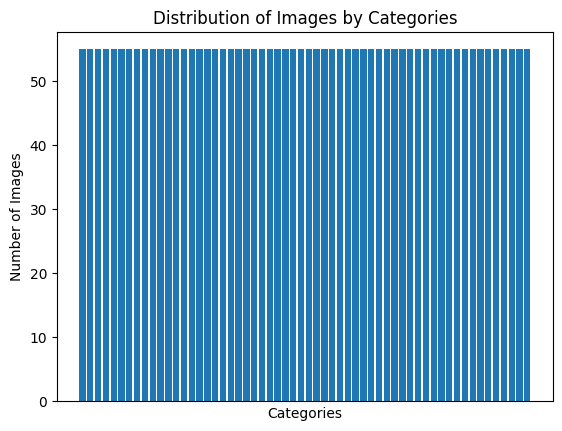

<Figure size 200x200 with 0 Axes>

Label: 000, Count: 55
Label: 001, Count: 55
Label: 002, Count: 55
Label: 003, Count: 55
Label: 004, Count: 55
Label: 005, Count: 55
Label: 006, Count: 55
Label: 007, Count: 55
Label: 008, Count: 55
Label: 009, Count: 55
Label: 010, Count: 55
Label: 011, Count: 55
Label: 012, Count: 55
Label: 013, Count: 55
Label: 014, Count: 55
Label: 015, Count: 55
Label: 016, Count: 55
Label: 017, Count: 55
Label: 018, Count: 55
Label: 019, Count: 55
Label: 020, Count: 55
Label: 021, Count: 55
Label: 022, Count: 55
Label: 023, Count: 55
Label: 024, Count: 55
Label: 025, Count: 55
Label: 026, Count: 55
Label: 027, Count: 55
Label: 028, Count: 55
Label: 029, Count: 55
Label: 030, Count: 55
Label: 031, Count: 55
Label: 032, Count: 55
Label: 033, Count: 55
Label: 034, Count: 55
Label: 035, Count: 55
Label: 036, Count: 55
Label: 037, Count: 55
Label: 038, Count: 55
Label: 039, Count: 55
Label: 040, Count: 55
Label: 041, Count: 55
Label: 042, Count: 55
Label: 043, Count: 55
Label: 044, Count: 55
Label: 045

In [16]:
import matplotlib.pyplot as plt
# After cleared

file_list = os.listdir("equalized_dataset")
images = [file for file in file_list]

labels = [image_name.split('_')[0] for image_name in images]
label_counts = Counter(labels)

# Create a histogram
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks([])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Categories')
plt.figure(figsize=(2,2))
plt.show()

for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")
    
total_count = sum(label_counts.values())
print(f"Total Count: {total_count}")

In [17]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [18]:
!pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [19]:
import tensorflow as tf
import sklearn
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [20]:
!pip install tqdm
from tqdm import tqdm


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [101]:
## Labelling category

category = {"000" : "speed limit 5KM/H",
            "001" : "speed limit 15KM/H",
            "002" : "speed limit 30KM/H",
            "003" : "speed limit 40KM/H",
            "004" : "speed limit 50KM/H",
            "005" : "speed limit 60KM/H",
            "006" : "speed limit 70KM/H",
            "007" : "speed limit 80KM/H",
            "008" : "Do not turn left or go staright",
            "009" : "Do not turn right or go staright",
            "010" : "Do not go straight",
            "011" : "Do not turn left",
            "012" : "Do not turn left or right",
            "013" : "Do not turn right",
            "014" : "No overtaking",
            "015" : "No U-Turn",
            "016" : "No Car",
            "017" : "No Horn",
            "018" : "speed limit 40KM/H ended",
            "019" : "speed limit 50KM/H ended",
            "020" : "Turn right or go straight",
            "021" : "Go straight",
            "022" : "Turn left",
            "023" : "Turn left or Turn Right",
            "024" : "Turn Right",
            "025" : "Stay at the left lane",
            "026" : "Stay at the right lane",
            "027" : "Roundabout",
            "028" : "Car Lane",
            "029" : "Horn Allowed",
            "030" : "Bicycle Lane",
            "031" : "U-Turn Allowed",
            "032" : "Bypass left and right",
            "033" : "Traffic light ahead",
            "034" : "Beware of Danger",
            "035" : "Beware of Pedestrian",
            "036" : "Beware of Bicycles",
            "037" : "Beware of Child",
            "038" : "Sharp Detour to the Right",
            "039" : "Sharp Detour to the Left",
            "040" : "Downhill Road",
            "041" : "Uphill Road",
            "042" : "Slow Down",
            "043" : "T-Junction",
            "044" : "T-Junction",
            "045" : "Village Ahead",
            "046" : "Reverse Detour",
            "047" : "Unguarded railway crossings",
            "048" : "Construction Ahead",
            "049" : "Continuous turn roads",
            "050" : "Guarded railway crossings",
            "051" : "Accident-prone section",
            "052" : "Stop",
            "053" : "Passing prohibited",
            "054" : "Parking prohibited",
            "055" : "No Entry",
            "056" : "Give way",
            "057" : "Stop for road block",
           }




In [40]:
output_folder = "equalized_dataset/"
preprocessed_images = [file for file in os.listdir (output_folder)]
X = []
X_train = []

for images in preprocessed_images:
    class_path = os.path.join(output_folder, images)
    img = cv.imread(class_path)
    print(img)
    X.append(img)
    
    
X_train = np.array(X)

print(X_train.shape)

[[[174 174 174]
  [171 171 171]
  [173 173 173]
  ...
  [ 66  66  66]
  [ 64  64  64]
  [ 71  71  71]]

 [[173 173 173]
  [170 170 170]
  [172 172 172]
  ...
  [ 75  75  75]
  [ 75  75  75]
  [ 78  78  78]]

 [[172 172 172]
  [172 172 172]
  [173 173 173]
  ...
  [ 79  79  79]
  [ 81  81  81]
  [ 82  82  82]]

 ...

 [[ 48  48  48]
  [ 27  27  27]
  [193 193 193]
  ...
  [ 19  19  19]
  [ 39  39  39]
  [ 39  39  39]]

 [[ 44  44  44]
  [ 25  25  25]
  [186 186 186]
  ...
  [ 19  19  19]
  [ 36  36  36]
  [ 37  37  37]]

 [[ 24  24  24]
  [ 24  24  24]
  [189 189 189]
  ...
  [ 19  19  19]
  [ 37  37  37]
  [ 38  38  38]]]
[[[122 122 122]
  [175 175 175]
  [178 178 178]
  ...
  [100 100 100]
  [ 99  99  99]
  [ 93  93  93]]

 [[125 125 125]
  [177 177 177]
  [178 178 178]
  ...
  [101 101 101]
  [ 97  97  97]
  [ 92  92  92]]

 [[148 148 148]
  [179 179 179]
  [178 178 178]
  ...
  [100 100 100]
  [ 94  94  94]
  [ 95  95  95]]

 ...

 [[ 57  57  57]
  [ 89  89  89]
  [180 180 180]
  ..

[[[ 94  94  94]
  [113 113 113]
  [111 111 111]
  ...
  [221 221 221]
  [219 219 219]
  [219 219 219]]

 [[ 93  93  93]
  [ 75  75  75]
  [ 88  88  88]
  ...
  [218 218 218]
  [219 219 219]
  [220 220 220]]

 [[ 90  90  90]
  [107 107 107]
  [137 137 137]
  ...
  [221 221 221]
  [218 218 218]
  [218 218 218]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  3   3   3]
  ...
  [125 125 125]
  [128 128 128]
  [124 124 124]]

 [[  0   0   0]
  [  0   0   0]
  [  4   4   4]
  ...
  [125 125 125]
  [123 123 123]
  [121 121 121]]

 [[  1   1   1]
  [  2   2   2]
  [  1   1   1]
  ...
  [120 120 120]
  [125 125 125]
  [126 126 126]]]
[[[ 98  98  98]
  [ 71  71  71]
  [ 43  43  43]
  ...
  [218 218 218]
  [218 218 218]
  [218 218 218]]

 [[ 49  49  49]
  [ 44  44  44]
  [ 42  42  42]
  ...
  [218 218 218]
  [217 217 217]
  [218 218 218]]

 [[ 77  77  77]
  [ 64  64  64]
  [ 79  79  79]
  ...
  [218 218 218]
  [216 216 216]
  [219 219 219]]

 ...

 [[  3   3   3]
  [  4   4   4]
  [  7   7   7]
  ..

[[[255 255 255]
  [ 36  36  36]
  [205 205 205]
  ...
  [192 192 192]
  [ 33  33  33]
  [225 225 225]]

 [[254 254 254]
  [ 40  40  40]
  [205 205 205]
  ...
  [182 182 182]
  [ 30  30  30]
  [210 210 210]]

 [[255 255 255]
  [ 33  33  33]
  [205 205 205]
  ...
  [160 160 160]
  [ 30  30  30]
  [104 104 104]]

 ...

 [[101 101 101]
  [ 27  27  27]
  [197 197 197]
  ...
  [186 186 186]
  [148 148 148]
  [ 33  33  33]]

 [[ 90  90  90]
  [ 27  27  27]
  [178 178 178]
  ...
  [191 191 191]
  [181 181 181]
  [ 33  33  33]]

 [[ 88  88  88]
  [ 27  27  27]
  [229 229 229]
  ...
  [195 195 195]
  [165 165 165]
  [ 33  33  33]]]
[[[224 224 224]
  [240 240 240]
  [240 240 240]
  ...
  [ 86  86  86]
  [ 29  29  29]
  [255 255 255]]

 [[223 223 223]
  [224 224 224]
  [229 229 229]
  ...
  [ 87  87  87]
  [ 29  29  29]
  [251 251 251]]

 [[244 244 244]
  [240 240 240]
  [234 234 234]
  ...
  [ 91  91  91]
  [ 32  32  32]
  [235 235 235]]

 ...

 [[191 191 191]
  [189 189 189]
  [227 227 227]
  ..

[[[197 197 197]
  [195 195 195]
  [193 193 193]
  ...
  [194 194 194]
  [194 194 194]
  [194 194 194]]

 [[197 197 197]
  [197 197 197]
  [196 196 196]
  ...
  [194 194 194]
  [194 194 194]
  [194 194 194]]

 [[198 198 198]
  [197 197 197]
  [193 193 193]
  ...
  [192 192 192]
  [194 194 194]
  [192 192 192]]

 ...

 [[162 162 162]
  [156 156 156]
  [145 145 145]
  ...
  [169 169 169]
  [166 166 166]
  [170 170 170]]

 [[176 176 176]
  [166 166 166]
  [129 129 129]
  ...
  [161 161 161]
  [167 167 167]
  [178 178 178]]

 [[165 165 165]
  [135 135 135]
  [129 129 129]
  ...
  [159 159 159]
  [167 167 167]
  [168 168 168]]]
[[[190 190 190]
  [196 196 196]
  [194 194 194]
  ...
  [189 189 189]
  [190 190 190]
  [190 190 190]]

 [[192 192 192]
  [194 194 194]
  [195 195 195]
  ...
  [184 184 184]
  [185 185 185]
  [189 189 189]]

 [[194 194 194]
  [196 196 196]
  [195 195 195]
  ...
  [175 175 175]
  [181 181 181]
  [182 182 182]]

 ...

 [[129 129 129]
  [133 133 133]
  [152 152 152]
  ..

[[[254 254 254]
  [170 170 170]
  [189 189 189]
  ...
  [194 194 194]
  [192 192 192]
  [191 191 191]]

 [[252 252 252]
  [178 178 178]
  [189 189 189]
  ...
  [231 231 231]
  [235 235 235]
  [248 248 248]]

 [[245 245 245]
  [182 182 182]
  [184 184 184]
  ...
  [178 178 178]
  [206 206 206]
  [234 234 234]]

 ...

 [[ 85  85  85]
  [ 57  57  57]
  [ 61  61  61]
  ...
  [ 18  18  18]
  [ 18  18  18]
  [ 16  16  16]]

 [[ 67  67  67]
  [ 60  60  60]
  [ 62  62  62]
  ...
  [ 12  12  12]
  [ 16  16  16]
  [ 29  29  29]]

 [[ 80  80  80]
  [ 68  68  68]
  [ 33  33  33]
  ...
  [ 11  11  11]
  [ 16  16  16]
  [ 24  24  24]]]
[[[141 141 141]
  [192 192 192]
  [197 197 197]
  ...
  [213 213 213]
  [212 212 212]
  [215 215 215]]

 [[215 215 215]
  [196 196 196]
  [198 198 198]
  ...
  [169 169 169]
  [175 175 175]
  [164 164 164]]

 [[238 238 238]
  [236 236 236]
  [188 188 188]
  ...
  [149 149 149]
  [163 163 163]
  [144 144 144]]

 ...

 [[194 194 194]
  [ 41  41  41]
  [ 87  87  87]
  ..

[[[139 139 139]
  [141 141 141]
  [144 144 144]
  ...
  [178 178 178]
  [177 177 177]
  [176 176 176]]

 [[ 59  59  59]
  [ 60  60  60]
  [ 61  61  61]
  ...
  [110 110 110]
  [110 110 110]
  [110 110 110]]

 [[ 46  46  46]
  [ 48  48  48]
  [ 52  52  52]
  ...
  [ 35  35  35]
  [ 32  32  32]
  [ 30  30  30]]

 ...

 [[137 137 137]
  [146 146 146]
  [137 137 137]
  ...
  [154 154 154]
  [142 142 142]
  [144 144 144]]

 [[133 133 133]
  [126 126 126]
  [126 126 126]
  ...
  [145 145 145]
  [134 134 134]
  [140 140 140]]

 [[135 135 135]
  [130 130 130]
  [126 126 126]
  ...
  [153 153 153]
  [150 150 150]
  [157 157 157]]]
[[[105 105 105]
  [ 96  96  96]
  [112 112 112]
  ...
  [179 179 179]
  [184 184 184]
  [187 187 187]]

 [[ 99  99  99]
  [102 102 102]
  [118 118 118]
  ...
  [182 182 182]
  [184 184 184]
  [182 182 182]]

 [[ 95  95  95]
  [ 99  99  99]
  [112 112 112]
  ...
  [187 187 187]
  [186 186 186]
  [185 185 185]]

 ...

 [[133 133 133]
  [130 130 130]
  [118 118 118]
  ..

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[ 17  17  17]
  [ 18  18  18]
  [ 11  11  11]
  ...
  [  0   0   0]
  [  3   3   3]
  [  0   0   0]]

 [[ 97  97  97]
  [ 87  87  87]
  [ 77  77  77]
  ...
  [  0   0   0]
  [  0   0   0]
  [  4   4   4]]

 [[148 148 148]
  [150 150 150]
  [147 147 147]
  ...
  [  1   1   1]
  [  0   0   0]
  [  3   3   3]]

 ...

 [[  5   5   5]
  [ 16  16  16]
  [ 45  45  45]
  ...
  [ 39  39  39]
  [ 14  14  14]
  [  5   5   5]]

 [[  2   2   2]
  [  1   1   1]
  [ 11  11  11]
  ...
  [ 14  14  14]
  [  5   5   5]
  [  5   5   5]]

 [[  0   0   0]
  [  4   4   4]
  [  6   6   6]
  ...
  [ 22

[[[126 126 126]
  [126 126 126]
  [131 131 131]
  ...
  [ 30  30  30]
  [ 17  17  17]
  [  4   4   4]]

 [[113 113 113]
  [112 112 112]
  [122 122 122]
  ...
  [ 31  31  31]
  [ 18  18  18]
  [  3   3   3]]

 [[114 114 114]
  [104 104 104]
  [132 132 132]
  ...
  [ 32  32  32]
  [ 21  21  21]
  [  4   4   4]]

 ...

 [[211 211 211]
  [171 171 171]
  [ 26  26  26]
  ...
  [118 118 118]
  [108 108 108]
  [ 85  85  85]]

 [[217 217 217]
  [174 174 174]
  [ 23  23  23]
  ...
  [106 106 106]
  [ 94  94  94]
  [ 95  95  95]]

 [[216 216 216]
  [173 173 173]
  [ 46  46  46]
  ...
  [117 117 117]
  [ 94  94  94]
  [114 114 114]]]
[[[0 0 0]
  [0 0 0]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[2 2 2]
  [1 1 1]
  [0 0 0]
  ...
  [1 1 1]
  [0 0 0]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0

[[[255 255 255]
  [254 254 254]
  [253 253 253]
  ...
  [ 33  33  33]
  [ 21  21  21]
  [ 22  22  22]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [ 56  56  56]
  [ 33  33  33]
  [ 23  23  23]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [ 59  59  59]
  [ 36  36  36]
  [ 25  25  25]]

 ...

 [[ 80  80  80]
  [104 104 104]
  [128 128 128]
  ...
  [ 37  37  37]
  [ 48  48  48]
  [ 47  47  47]]

 [[ 69  69  69]
  [ 82  82  82]
  [127 127 127]
  ...
  [ 26  26  26]
  [ 23  23  23]
  [ 14  14  14]]

 [[ 68  68  68]
  [ 67  67  67]
  [ 92  92  92]
  ...
  [ 24  24  24]
  [  9   9   9]
  [  7   7   7]]]
[[[254 254 254]
  [254 254 254]
  [224 224 224]
  ...
  [ 23  23  23]
  [ 19  19  19]
  [ 27  27  27]]

 [[247 247 247]
  [242 242 242]
  [212 212 212]
  ...
  [ 21  21  21]
  [ 23  23  23]
  [ 33  33  33]]

 [[106 106 106]
  [106 106 106]
  [110 110 110]
  ...
  [ 35  35  35]
  [ 36  36  36]
  [ 37  37  37]]

 ...

 [[178 178 178]
  [160 160 160]
  [142 142 142]
  ..

[[[210 210 210]
  [237 237 237]
  [233 233 233]
  ...
  [221 221 221]
  [249 249 249]
  [249 249 249]]

 [[186 186 186]
  [207 207 207]
  [204 204 204]
  ...
  [230 230 230]
  [249 249 249]
  [248 248 248]]

 [[166 166 166]
  [173 173 173]
  [185 185 185]
  ...
  [222 222 222]
  [249 249 249]
  [253 253 253]]

 ...

 [[130 130 130]
  [118 118 118]
  [130 130 130]
  ...
  [177 177 177]
  [158 158 158]
  [167 167 167]]

 [[114 114 114]
  [102 102 102]
  [ 95  95  95]
  ...
  [192 192 192]
  [173 173 173]
  [198 198 198]]

 [[147 147 147]
  [146 146 146]
  [172 172 172]
  ...
  [191 191 191]
  [167 167 167]
  [152 152 152]]]
[[[128 128 128]
  [195 195 195]
  [222 222 222]
  ...
  [ 21  21  21]
  [ 24  24  24]
  [ 21  21  21]]

 [[131 131 131]
  [118 118 118]
  [ 70  70  70]
  ...
  [ 59  59  59]
  [ 31  31  31]
  [ 17  17  17]]

 [[111 111 111]
  [194 194 194]
  [217 217 217]
  ...
  [113 113 113]
  [ 48  48  48]
  [ 23  23  23]]

 ...

 [[ 79  79  79]
  [ 67  67  67]
  [ 97  97  97]
  ..

[[[113 113 113]
  [ 95  95  95]
  [ 84  84  84]
  ...
  [  4   4   4]
  [  2   2   2]
  [  2   2   2]]

 [[113 113 113]
  [ 92  92  92]
  [ 92  92  92]
  ...
  [  5   5   5]
  [  1   1   1]
  [  0   0   0]]

 [[129 129 129]
  [100 100 100]
  [100 100 100]
  ...
  [ 10  10  10]
  [  7   7   7]
  [  5   5   5]]

 ...

 [[217 217 217]
  [214 214 214]
  [214 214 214]
  ...
  [ 28  28  28]
  [ 29  29  29]
  [ 21  21  21]]

 [[217 217 217]
  [211 211 211]
  [214 214 214]
  ...
  [ 29  29  29]
  [ 28  28  28]
  [ 18  18  18]]

 [[222 222 222]
  [221 221 221]
  [216 216 216]
  ...
  [ 31  31  31]
  [ 32  32  32]
  [ 23  23  23]]]
[[[193 193 193]
  [176 176 176]
  [167 167 167]
  ...
  [  9   9   9]
  [  7   7   7]
  [  6   6   6]]

 [[196 196 196]
  [183 183 183]
  [173 173 173]
  ...
  [ 13  13  13]
  [ 10  10  10]
  [  8   8   8]]

 [[201 201 201]
  [184 184 184]
  [169 169 169]
  ...
  [ 15  15  15]
  [ 14  14  14]
  [ 14  14  14]]

 ...

 [[211 211 211]
  [209 209 209]
  [206 206 206]
  ..

[[[254 254 254]
  [254 254 254]
  [ 45  45  45]
  ...
  [228 228 228]
  [190 190 190]
  [171 171 171]]

 [[253 253 253]
  [253 253 253]
  [ 41  41  41]
  ...
  [235 235 235]
  [188 188 188]
  [209 209 209]]

 [[253 253 253]
  [253 253 253]
  [ 44  44  44]
  ...
  [230 230 230]
  [230 230 230]
  [237 237 237]]

 ...

 [[ 42  42  42]
  [108 108 108]
  [ 86  86  86]
  ...
  [112 112 112]
  [177 177 177]
  [160 160 160]]

 [[ 44  44  44]
  [134 134 134]
  [131 131 131]
  ...
  [115 115 115]
  [100 100 100]
  [142 142 142]]

 [[ 46  46  46]
  [164 164 164]
  [108 108 108]
  ...
  [ 79  79  79]
  [ 84  84  84]
  [100 100 100]]]
[[[178 178 178]
  [172 172 172]
  [207 207 207]
  ...
  [203 203 203]
  [228 228 228]
  [236 236 236]]

 [[182 182 182]
  [167 167 167]
  [188 188 188]
  ...
  [212 212 212]
  [224 224 224]
  [229 229 229]]

 [[166 166 166]
  [181 181 181]
  [180 180 180]
  ...
  [232 232 232]
  [239 239 239]
  [240 240 240]]

 ...

 [[109 109 109]
  [108 108 108]
  [117 117 117]
  ..

[[[198 198 198]
  [198 198 198]
  [201 201 201]
  ...
  [253 253 253]
  [252 252 252]
  [252 252 252]]

 [[195 195 195]
  [198 198 198]
  [199 199 199]
  ...
  [251 251 251]
  [252 252 252]
  [252 252 252]]

 [[193 193 193]
  [192 192 192]
  [194 194 194]
  ...
  [249 249 249]
  [252 252 252]
  [251 251 251]]

 ...

 [[107 107 107]
  [109 109 109]
  [107 107 107]
  ...
  [118 118 118]
  [121 121 121]
  [119 119 119]]

 [[105 105 105]
  [100 100 100]
  [107 107 107]
  ...
  [118 118 118]
  [123 123 123]
  [119 119 119]]

 [[106 106 106]
  [105 105 105]
  [108 108 108]
  ...
  [118 118 118]
  [122 122 122]
  [119 119 119]]]
[[[208 208 208]
  [214 214 214]
  [211 211 211]
  ...
  [218 218 218]
  [221 221 221]
  [220 220 220]]

 [[207 207 207]
  [212 212 212]
  [218 218 218]
  ...
  [218 218 218]
  [224 224 224]
  [220 220 220]]

 [[209 209 209]
  [216 216 216]
  [212 212 212]
  ...
  [212 212 212]
  [214 214 214]
  [212 212 212]]

 ...

 [[141 141 141]
  [140 140 140]
  [123 123 123]
  ..

[[[  0   0   0]
  [ 13  13  13]
  [ 66  66  66]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   1   1]
  [ 50  50  50]
  [235 235 235]
  ...
  [ 17  17  17]
  [ 13  13  13]
  [  5   5   5]]

 [[  0   0   0]
  [ 47  47  47]
  [235 235 235]
  ...
  [ 78  78  78]
  [ 75  75  75]
  [ 33  33  33]]

 ...

 [[  1   1   1]
  [  6   6   6]
  [  6   6   6]
  ...
  [ 12  12  12]
  [  6   6   6]
  [  0   0   0]]

 [[  0   0   0]
  [  3   3   3]
  [  2   2   2]
  ...
  [  8   8   8]
  [  5   5   5]
  [  1   1   1]]

 [[  0   0   0]
  [  1   1   1]
  [  0   0   0]
  ...
  [  4   4   4]
  [  0   0   0]
  [  1   1   1]]]
[[[136 136 136]
  [129 129 129]
  [151 151 151]
  ...
  [142 142 142]
  [197 197 197]
  [190 190 190]]

 [[126 126 126]
  [ 88  88  88]
  [142 142 142]
  ...
  [189 189 189]
  [140 140 140]
  [176 176 176]]

 [[125 125 125]
  [133 133 133]
  [205 205 205]
  ...
  [193 193 193]
  [132 132 132]
  [181 181 181]]

 ...

 [[ 66  66  66]
  [ 76  76  76]
  [146 146 146]
  ..

[[[2 2 2]
  [0 0 0]
  [3 3 3]
  ...
  [1 1 1]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [4 4 4]
  [0 0 0]
  ...
  [1 1 1]
  [0 0 0]
  [5 5 5]]

 [[2 2 2]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [5 5 5]
  [0 0 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [3 3 3]
  [1 1 1]]

 [[1 1 1]
  [0 0 0]
  [4 4 4]
  ...
  [2 2 2]
  [1 1 1]
  [0 0 0]]

 [[0 0 0]
  [2 2 2]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [1 1 1]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 [[0 0 0]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [1 1 1]
  [0 0 0]
  ...


[[[0 0 0]
  [0 0 0]
  [2 2 2]
  ...
  [0 0 0]
  [2 2 2]
  [0 0 0]]

 [[0 0 0]
  [2 2 2]
  [0 0 0]
  ...
  [2 2 2]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [2 2 2]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 ...

 [[1 1 1]
  [0 0 0]
  [5 5 5]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [2 2 2]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [2 2 2]
  ...
  [1 1 1]
  [0 0 0]
  [0 0 0]]]
[[[252 252 252]
  [255 255 255]
  [251 251 251]
  ...
  [248 248 248]
  [246 246 246]
  [247 247 247]]

 [[249 249 249]
  [252 252 252]
  [251 251 251]
  ...
  [236 236 236]
  [238 238 238]
  [237 237 237]]

 [[249 249 249]
  [249 249 249]
  [251 251 251]
  ...
  [198 198 198]
  [195 195 195]
  [198 198 198]]

 ...

 [[117 117 117]
  [107 107 107]
  [115 115 115]
  ...
  [209 209 209]
  [226 226 226]
  [240 240 240]]

 [[109 109 109]
  [149 149 149]
  [171 171 171]
  ...
  [222 222 222]
  [239 239 239]
  [238 238 238]]

 [[205 205 205]
  [220 220 220]
  [216 216 216]
  ...
  [229

[[[14 14 14]
  [16 16 16]
  [15 15 15]
  ...
  [ 5  5  5]
  [ 4  4  4]
  [ 5  5  5]]

 [[16 16 16]
  [17 17 17]
  [17 17 17]
  ...
  [ 3  3  3]
  [ 4  4  4]
  [ 4  4  4]]

 [[12 12 12]
  [12 12 12]
  [16 16 16]
  ...
  [ 2  2  2]
  [ 3  3  3]
  [ 3  3  3]]

 ...

 [[ 2  2  2]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [12 12 12]
  [ 9  9  9]
  [ 5  5  5]]

 [[ 2  2  2]
  [ 1  1  1]
  [ 0  0  0]
  ...
  [13 13 13]
  [10 10 10]
  [ 4  4  4]]

 [[ 2  2  2]
  [ 1  1  1]
  [ 0  0  0]
  ...
  [15 15 15]
  [13 13 13]
  [ 8  8  8]]]
[[[ 2  2  2]
  [13 13 13]
  [17 17 17]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 3  3  3]]

 [[ 2  2  2]
  [12 12 12]
  [11 11 11]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 1  1  1]]

 [[ 4  4  4]
  [16 16 16]
  [12 12 12]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 ...

 [[ 0  0  0]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 5  5  5]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 0  0  0]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 9  9  9]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]
  .

[[[147 147 147]
  [ 98  98  98]
  [ 62  62  62]
  ...
  [ 59  59  59]
  [ 66  66  66]
  [ 67  67  67]]

 [[126 126 126]
  [135 135 135]
  [ 75  75  75]
  ...
  [ 50  50  50]
  [ 86  86  86]
  [ 85  85  85]]

 [[103 103 103]
  [137 137 137]
  [109 109 109]
  ...
  [ 82  82  82]
  [ 76  76  76]
  [ 83  83  83]]

 ...

 [[ 59  59  59]
  [ 76  76  76]
  [ 64  64  64]
  ...
  [  3   3   3]
  [  3   3   3]
  [  0   0   0]]

 [[ 87  87  87]
  [ 42  42  42]
  [ 35  35  35]
  ...
  [ 23  23  23]
  [  5   5   5]
  [  6   6   6]]

 [[ 71  71  71]
  [ 57  57  57]
  [ 44  44  44]
  ...
  [  2   2   2]
  [  3   3   3]
  [  3   3   3]]]
[[[167 167 167]
  [139 139 139]
  [139 139 139]
  ...
  [113 113 113]
  [229 229 229]
  [185 185 185]]

 [[168 168 168]
  [144 144 144]
  [147 147 147]
  ...
  [120 120 120]
  [230 230 230]
  [185 185 185]]

 [[172 172 172]
  [147 147 147]
  [146 146 146]
  ...
  [126 126 126]
  [228 228 228]
  [185 185 185]]

 ...

 [[182 182 182]
  [181 181 181]
  [178 178 178]
  ..

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[  0   0   0]
  [ 31  31  31]
  [ 60  60  60]
  ...
  [224 224 224]
  [230 230 230]
  [183 183 183]]

 [[  2   2   2]
  [ 29  29  29]
  [ 56  56  56]
  ...
  [227 227 227]
  [229 229 229]
  [192 192 192]]

 [[  3   3   3]
  [ 28  28  28]
  [ 51  51  51]
  ...
  [228 228 228]
  [228 228 228]
  [203 203 203]]

 ...

 [[ 39  39  39]
  [  2   2   2]
  [ 27  27  27]
  ...
  [221 221 221]
  [214 214 214]
  [213 213 213]]

 [[ 35  35  35]
  [  6   6   6]
  [ 37  37  37]
  ...
  [221 221 221]
  [215 215 215]
  [216 216 216]]

 [[ 16  16  16]
  [  0   0   0]
  [ 37  37  37]
  ...
  [225

In [41]:
#Test set
output_folders = 'TSRD-Test/'

In [42]:
def resize_img():
    input_folders = 'TSRD-Test/'

    if not os.path.exists(output_folders):
        os.makedirs(output_folders)
    
    resize_width = 64
    resize_height = 64

    for filename in os.listdir(input_folders):
        if filename.endswith(('.png')):
            image_path = os.path.join(input_folders, filename)
            image = cv.imread(image_path)

            resized_image = cv.resize(image, (resize_width, resize_height))

            cv.imwrite((image_path), resized_image)


resize_img()
print("All images has been resized.")

All images has been resized.


In [43]:
preprocessed_images = [file for file in os.listdir (output_folders)]
X_test = [] 

for images in preprocessed_images:
    print(images)
    class_path = os.path.join(output_folders, images)
    
    img = cv.imread(class_path)
    X_test.append(img)

X_test = np.array(X_test)
print(X_test.shape)

000_0001_j.png
000_0002_j.png
000_0003_j.png
000_0004_j.png
000_0005_j.png
000_0006_j.png
000_0007_j.png
000_1_0001_1_j.png
000_1_0002_1_j.png
000_1_0003_1_j.png
000_1_0004_1_j.png
000_1_0005_1_j.png
000_1_0006_1_j.png
000_1_0007_1_j.png
001_0001_j.png
001_0002_j.png
001_0003_j.png
001_0004_j.png
001_0005_j.png
001_0006_j.png
001_1_0001_1_j.png
001_1_0002_1_j.png
001_1_0003_1_j.png
001_1_0004_1_j.png
001_1_0005_1_j.png
001_1_0006_1_j.png
002_0001_j.png
002_0002_j.png
002_0003_j.png
002_0004_j.png
002_0005_j.png
002_0006_j.png
002_0007_j.png
002_0008_j.png
002_0009_j.png
002_0010_j.png
002_0011_j.png
002_0012_j.png
002_0014.png
002_0015.png
002_0016.png
002_0017.png
002_0018.png
002_0019.png
002_0020.png
002_0021.png
002_0022.png
002_0023.png
002_0024.png
002_0025.png
002_0026.png
002_0027.png
002_0028.png
002_0029.png
002_0030.png
002_0031.png
002_1_0001_1_j.png
002_1_0002_1_j.png
002_1_0003_1_j.png
002_1_0004_1_j.png
002_1_0005_1_j.png
002_1_0006_1_j.png
002_1_0007_1_j.png
002_1_0008_

011_1_0018_1_j.png
011_1_0019_1_j.png
011_1_0020_1_j.png
011_1_0021_1_j.png
011_1_0022_1_j.png
011_1_0023_1_j.png
011_1_0024_1_j.png
011_1_0025_1_j.png
011_1_0026_1_j.png
011_1_0027_1_j.png
011_1_0028_1_j.png
011_1_0029_1_j.png
011_1_0030_1_j.png
011_1_0031_1_j.png
011_1_0032_1_j.png
011_1_0033_1_j.png
011_1_0034_1_j.png
011_1_0035_1_j.png
011_1_0036_1_j.png
011_1_0037_1_j.png
011_1_0038_1_j.png
011_1_0039_1_j.png
011_1_0040_1_j.png
011_1_0041_1_j.png
011_1_0042_1_j.png
011_1_0043_1_j.png
011_1_0044_1_j.png
011_1_0045_1_j.png
011_1_0046_1_j.png
011_1_0047_1_j.png
011_1_0048_1_j.png
011_1_0049_1_j.png
011_1_0050_1_j.png
011_1_0051_1_j.png
011_1_0052_1_j.png
011_1_0053_1_j.png
011_1_0054_1_j.png
011_1_0056.png
011_1_0057.png
011_1_0058.png
011_1_0059.png
011_1_0060.png
011_1_0061.png
011_1_0062.png
011_1_0063.png
011_1_0064.png
011_1_0065.png
011_1_0066.png
012_0001_j.png
012_0002_j.png
012_0003_j.png
012_0004_j.png
012_0005_j.png
012_0006_j.png
012_0007_j.png
012_0008_j.png
012_0009_j.p

026_1_0032_1_j.png
026_1_0033_1_j.png
026_1_0034_1_j.png
026_1_0035_1_j.png
026_1_0036_1_j.png
026_1_0037_1_j.png
026_1_0038_1_j.png
026_1_0039_1_j.png
026_1_0040_1_j.png
026_1_0041_1_j.png
026_1_0042_1_j.png
026_1_0043_1_j.png
026_1_0044_1_j.png
026_1_0045_1_j.png
026_1_0046_1_j.png
026_1_0047_1_j.png
026_1_0048_1_j.png
026_1_0049_1_j.png
026_1_0050_1_j.png
026_1_0051_1_j.png
026_1_0052_1_j.png
026_1_0053_1_j.png
026_1_0054_1_j.png
026_1_0055_1_j.png
026_1_0056_1_j.png
026_1_0057_1_j.png
026_1_0058_1_j.png
026_1_0059_1_j.png
026_1_0060_1_j.png
026_1_0061_1_j.png
026_1_0062_1_j.png
026_1_0063_1_j.png
026_1_0064_1_j.png
026_1_0065_1_j.png
026_1_0066_1_j.png
026_1_0067_1_j.png
027_0001_j.png
027_0002_j.png
027_0003_j.png
027_0004_j.png
027_0005_j.png
027_0006_j.png
027_0007_j.png
027_0008_j.png
027_0009_j.png
027_0010_j.png
027_0011_j.png
027_0012_j.png
027_1_0001_1_j.png
027_1_0002_1_j.png
027_1_0003_1_j.png
027_1_0004_1_j.png
027_1_0005_1_j.png
027_1_0006_1_j.png
027_1_0007_1_j.png
027

043_1_0037.png
043_1_0038.png
043_1_0039.png
043_1_0040.png
043_1_0041.png
043_1_0042.png
043_1_0043.png
043_1_0044.png
043_1_0045.png
043_1_0046.png
043_1_0047.png
043_1_0048.png
043_1_0049.png
043_1_0050.png
043_1_0051.png
043_1_0052.png
043_1_0053.png
043_1_0054.png
043_1_0055.png
043_1_0056.png
043_1_0057.png
043_1_0058.png
043_1_0059.png
044_0001_j.png
044_0002_j.png
044_0003_j.png
044_0004_j.png
044_0005_j.png
044_0006_j.png
044_0007_j.png
044_0008_j.png
044_0009_j.png
044_0010_j.png
044_0011_j.png
044_0012_j.png
044_1_0001_1_j.png
044_1_0002_1_j.png
044_1_0003_1_j.png
044_1_0004_1_j.png
044_1_0005_1_j.png
044_1_0006_1_j.png
044_1_0007_1_j.png
044_1_0008_1_j.png
044_1_0009_1_j.png
044_1_0010_1_j.png
044_1_0011_1_j.png
044_1_0012_1_j.png
045_0013.png
045_1_0013.png
046_0002_j.png
046_0003_j.png
046_0004_j.png
046_0006_j.png
046_0007_j.png
046_0008_j.png
046_0009_j.png
046_1_0002_1_j.png
046_1_0003_1_j.png
046_1_0004_1_j.png
046_1_0006_1_j.png
046_1_0007_1_j.png
046_1_0008_1_j.png


In [44]:
y_test = []
y_label = []

for root, dirs, files in os.walk(output_folders):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'): 
            # image_path = os.path.join(root, file)
            y_test.append(file)
            
for filename in y_test:
    category = filename.split('_')[0]
    y_label.append(category)

In [45]:
print(len(y_label))

1994


In [46]:
# Stores labels and images in the array for x_train

images = []
x_labels = [] # Test set labels
for root, dirs, files in os.walk(output_folder):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'): 
            # image_path = os.path.join(root, file)
            images.append(file)
            
for filename in images:
    category = filename.split('_')[0]
    x_labels.append(category)
    
print(len(x_labels))    

3190


In [47]:
# find each images for each label unique in train

uniqueimg = []
check = []

for filename in images:
    category = filename.split('_')[0]
    
    if category not in check:
        uniqueimg.append(filename)
        check.append(category)

print(check)

['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057']


In [48]:
def ModifiedLeNet5(input_shape, num_classes):

    model = models.Sequential()

    # Block conv1
    model.add(Conv2D(60, kernel_size=(5, 5), activation=LeakyReLU(), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(60, kernel_size=(5, 5),activation=LeakyReLU(), ))
    model.add(BatchNormalization())

    # MP
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block conv2
    model.add(Conv2D(30, kernel_size=(3, 3), activation=LeakyReLU(),))
    model.add(BatchNormalization())
    model.add(Conv2D(30, kernel_size=(3, 3), activation=LeakyReLU(),))
    model.add(BatchNormalization())

    # MP, DO
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))

    # Block FC
    model.add(layers.Flatten())
    model.add(BatchNormalization())
    model.add(layers.Dense(500, activation=LeakyReLU(),))

    # DO
    model.add(layers.Dropout(0.5))

    # softmax/Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Define input shape 
input_shape = (64, 64, 3)

# Define the number of classes
num_classes = 58  # Adjust this according to your dataset

# Create the modified LeNet-5 model
modified_lenet_model = ModifiedLeNet5(input_shape, num_classes)

# Display model summary
modified_lenet_model.summary()

optimizer = tf.keras.optimizers.Adadelta(learning_rate=1.0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 60, 60, 60)        4560      
                                                                 
 batch_normalization_5 (Bat  (None, 60, 60, 60)        240       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 60)        90060     
                                                                 
 batch_normalization_6 (Bat  (None, 56, 56, 60)        240       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 60)        0         
 g2D)                                                            
                                                      

In [49]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(x_labels, num_classes=num_classes)

# X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [50]:
modified_lenet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
print(X_train.shape)
print(y_train.shape)

(3190, 64, 64, 3)
(3190, 58)


In [ ]:
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

batch_size = 32
epochs = 10

for i in tqdm(range(int(2))):
    modified_lenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))
    
    training_losses.extend(history.history['loss'])
    validation_losses.extend(history.history['val_loss'])
    training_accuracies.extend(history.history['accuracy'])
    validation_accuracies.extend(history.history['val_accuracy'])
    
    pass


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

Epoch 1/10
100/100 [==============================] - 135s 1s/step - loss: 0.9010 - accuracy: 0.7718 - val_loss: 0.7952 - val_accuracy: 0.8691
Epoch 2/10
100/100 [==============================] - 129s 1s/step - loss: 0.5644 - accuracy: 0.8564 - val_loss: 0.2991 - val_accuracy: 0.9162
Epoch 3/10
100/100 [==============================] - 152s 2s/step - loss: 0.3653 - accuracy: 0.9009 - val_loss: 0.1483 - val_accuracy: 0.9555
Epoch 4/10
100/100 [==============================] - 139s 1s/step - loss: 0.2947 - accuracy: 0.9154 - val_loss: 0.1561 - val_accuracy: 0.9607
Epoch 5/10
100/100 [==============================] - 136s 1s/step - loss: 0.2479 - accuracy: 0.9351 - val_loss: 0.0115 - val_accuracy: 0.9974
Epoch 6/10
100/100 [==============================] - 124s 1s/step - loss: 0.2093 - accuracy: 0.9433 - val_loss: 0.0533 - val_accuracy: 0.9791
Epoch 7/10
100/100 [==============================] - 129s 1s/step - loss: 0.1655 - accuracy: 0.9542 - val_loss: 0.0015 - val_accuracy: 1.0000

In [ ]:
# Assuming you have collected training and validation metrics in separate lists/arrays
epochs = range(1, len(training_losses) + 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_losses, label='Training Loss')
plt.plot(epochs, validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracies, label='Training Accuracy')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [53]:
print(len(X_train))


3190


In [54]:
print(len(X_test))

1994


In [55]:
y_pred = modified_lenet_model.predict(X_test)

63/63 [==============================] - 15s 239ms/step


In [56]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [57]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

Sum of predicted values for each class: [  4   6  22  26   0   0 174  22  12 212  70  24  20  12  28  48  46 182
 204   2   2   2  12  18   0  40  36  32  16   2   4 202   0  10   0  50
   0 128   2   6   0   0   0   0  38  56   6   0   2   0 102   0  44  18
  28  24]
Sum of actual values for each class: [ 14  12  60  84  58  50  30  50  14  60 130  22  92  12  36  76  84   0
   0   2  12   8  10  26   2 134  24  68  26  34  18   2   8  46  12  26
  40  30   8   8  18 116  24   2  14  10   6  42  20   4  30   2 176  58
  40   4]


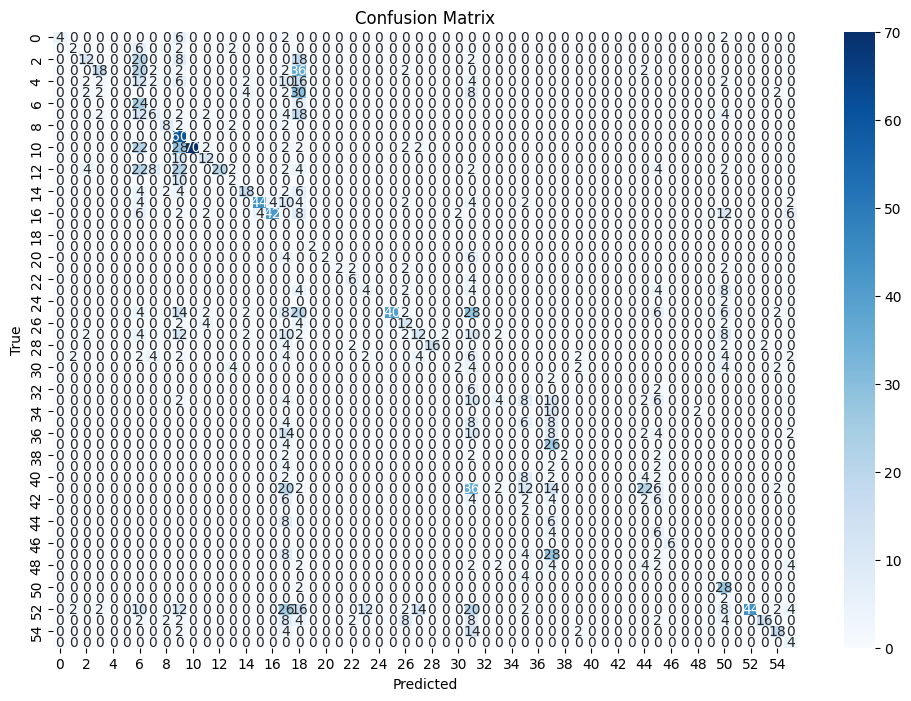

In [58]:
import seaborn as sns

predictLabel = []
predicted_labels = np.argmax(y_pred, axis=1)

for number in predicted_labels:
  # Convert the numpy array to a string with space-separated numbers
    predicted_string = ' '.join(map(str, predicted_labels))
    # Split the string by space and store each number in an array
    predictLabel = predicted_string.split()
    padded_Label = [f'{int(item):03}' for item in predictLabel]

confusion = confusion_matrix(y_label, padded_Label)


# Calculate the sum of predicted and actual values for each category
sum_predicted = np.sum(confusion, axis=0)  # Sum of predicted values for each class
sum_actual = np.sum(confusion, axis=1)  # Sum of actual values for each class

# Print the sum of predicted and actual values for each category
print("Sum of predicted values for each class:", sum_predicted)
print("Sum of actual values for each class:", sum_actual)

plt.figure(figsize=(12,8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [62]:
labels = y_label  # Replace with your actual array

# Find the unique classes or labels
unique_label_classes = np.unique(labels)

# Get the number of unique classes
num_classes = len(unique_label_classes)

print(num_classes)


54


In [63]:
print(classification_report(y_label, padded_Label))

              precision    recall  f1-score   support

         000       1.00      0.29      0.44        14
         001       0.33      0.17      0.22        12
         002       0.55      0.20      0.29        60
         003       0.69      0.21      0.33        84
         004       0.00      0.00      0.00        58
         005       0.00      0.00      0.00        50
         006       0.14      0.80      0.24        30
         007       0.27      0.12      0.17        50
         008       0.67      0.57      0.62        14
         010       0.28      1.00      0.44        60
         011       1.00      0.54      0.70       130
         012       0.50      0.55      0.52        22
         013       1.00      0.22      0.36        92
         014       0.17      0.17      0.17        12
         015       0.64      0.50      0.56        36
         016       0.92      0.58      0.71        76
         017       0.91      0.50      0.65        84
         018       0.00    

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [64]:
strings_only_in_check = set(check) - set(padded_Label)

# Find the strings that are in list2 but not in list1
strings_only_in_padded_Label = set(padded_Label) - set(check)

# Combine the results to get the strings that are not in both lists
strings_not_in_both = strings_only_in_check.union(strings_only_in_padded_Label)

# Convert the result back to a list if needed
result_list = list(strings_not_in_both)

# Print the result
print(strings_only_in_check) # In Testing set
print(strings_only_in_padded_Label) # In predicted set
print(result_list)

num_test_images = len(X_test)

# Generate a random index within the range of the number of test images
random_index = random.randint(0, num_test_images - 1)

# Get the randomly selected image
random_test_image = X_test[random_index]# From the confusion matrix and classification report, this indicates and proofs that which category is not inside the testing dataset.

{'036', '051', '038', '043', '045', '044', '033', '042', '005', '004', '049', '025', '053', '009', '034'}
set()
['036', '051', '038', '043', '045', '044', '033', '042', '005', '004', '049', '025', '053', '009', '034']


In [65]:
preprocessed_images = [file for file in os.listdir (output_folders)]
X_testing = [] 
X_name = []

for images in preprocessed_images:
    class_path = os.path.join(output_folders, images)
    X_name.append(class_path)
    img = cv.imread(class_path)
    X_testing.append(img)

X_testing = np.array(X_testing)
print(X_name)

['TSRD-Test/000_0001_j.png', 'TSRD-Test/000_0002_j.png', 'TSRD-Test/000_0003_j.png', 'TSRD-Test/000_0004_j.png', 'TSRD-Test/000_0005_j.png', 'TSRD-Test/000_0006_j.png', 'TSRD-Test/000_0007_j.png', 'TSRD-Test/000_1_0001_1_j.png', 'TSRD-Test/000_1_0002_1_j.png', 'TSRD-Test/000_1_0003_1_j.png', 'TSRD-Test/000_1_0004_1_j.png', 'TSRD-Test/000_1_0005_1_j.png', 'TSRD-Test/000_1_0006_1_j.png', 'TSRD-Test/000_1_0007_1_j.png', 'TSRD-Test/001_0001_j.png', 'TSRD-Test/001_0002_j.png', 'TSRD-Test/001_0003_j.png', 'TSRD-Test/001_0004_j.png', 'TSRD-Test/001_0005_j.png', 'TSRD-Test/001_0006_j.png', 'TSRD-Test/001_1_0001_1_j.png', 'TSRD-Test/001_1_0002_1_j.png', 'TSRD-Test/001_1_0003_1_j.png', 'TSRD-Test/001_1_0004_1_j.png', 'TSRD-Test/001_1_0005_1_j.png', 'TSRD-Test/001_1_0006_1_j.png', 'TSRD-Test/002_0001_j.png', 'TSRD-Test/002_0002_j.png', 'TSRD-Test/002_0003_j.png', 'TSRD-Test/002_0004_j.png', 'TSRD-Test/002_0005_j.png', 'TSRD-Test/002_0006_j.png', 'TSRD-Test/002_0007_j.png', 'TSRD-Test/002_0008_j.p

1/1 [==============================] - 0s 32ms/step
023
Predicted Class: Turn left or Turn Right


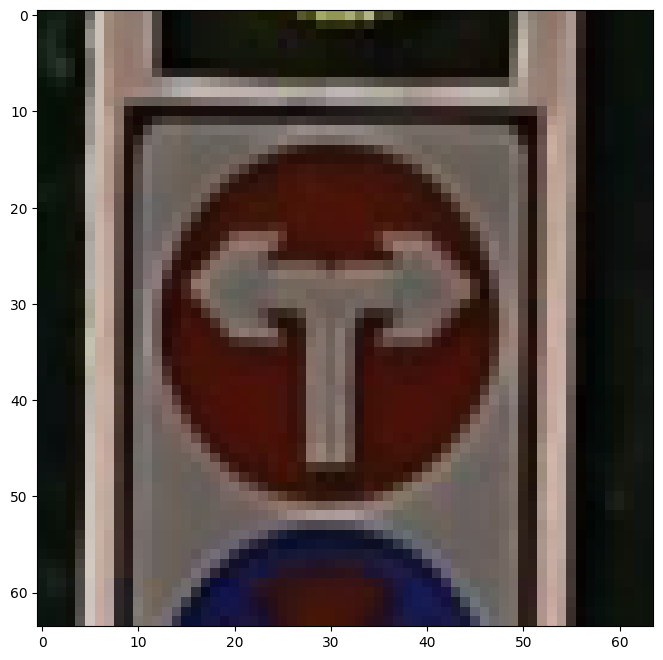

In [113]:
num_test_images = len(X_name)
random_index = random.randint(0, num_test_images - 1)
random_test_image = X_name[random_index]

img_path = random_test_image  
img = cv.imread(img_path)  
imgdisplay = img
img = np.expand_dims(img, axis=0) 

# Make predictions
predictions = modified_lenet_model.predict(img)

# Find the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class to a label using your category dictionary

predicted_class_str = str(predicted_class[0])
predicted_class_str = str(predicted_class_str).zfill(3)
print(predicted_class_str)

predicted_description = category.get(predicted_class_str)

    
# Display or use the predicted label

plt.figure(figsize=(12,8))
plt.imshow(imgdisplay)

print("Predicted Class:", predicted_description)